
# Digital Signal Processing (DSP) Algorithm Tutorial


## Spectral Estimation of [Stochastic Signals](https://en.wikipedia.org/wiki/Stochastic_process)


One of the widely used Digital Signal Processing ([DSP](https://en.wikipedia.org/wiki/Digital_signal_processing)) algorithms is the Spectral Density Estimation ([SDE](https://en.wikipedia.org/wiki/Spectral_density_estimation)) of periodic and random signals. Many of the speech recognition problems use spectrum analysis as such for [acoustic processing](https://en.wikipedia.org/wiki/Acoustics#Acoustic_signal_processing) of the speech signals and to perform speech bandwidth reduction. Spectral estimation measurements in radar detection are used to acquire velocity information and target location. In addition to this, sonar systems use highly complex spectrum analysis to locate submarines and surface vessels. [1] 

Spectral methods are important in time series analysis as they provide framework for handling periodic phenomena in the field of datascience. It also finds its significance in many diverse fields such as in vibration monitoring, the spectral content of measured signals give information on the wear and tear of mechanical & moving parts. In economics, meteorology, astronomy and several other fields, the spectral analysis helps in estimating the “hidden periodicities” in the studied data. [2]

A spectrum is defined as a relationship between magnitude of the plot against its frequency. In the field of electronics, signals are represented as a fixed or varying electrical quantities of voltage current and power. They are typically expressed in the time domain and for every function of time, an equivalent frequency domain function depicts the frequency spectrum that is required to generate that function of time. [Fourier analysis and transforms](https://en.wikipedia.org/wiki/Fourier_transform) plays a vital role in the study of relationships between the time domain and its corresponding frequency domain representations. [1]

Following are the various statistical measures that are used to characterize the random processes and signal:

•	Linear Mean of ([Linear Time Invariant](https://en.wikipedia.org/wiki/Linear_time-invariant_theory)) LTI systems

•	[Auto-Correlation Function](https://en.wikipedia.org/wiki/Autocorrelation) (ACF)

•	[Short-Time Fourier Transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform) (STFT)

•	[Power Spectral Density](https://en.wikipedia.org/wiki/Spectral_density) (PSD)

PSD Estimation is taken for the cases of [Wide Sense or Strict Sense Stationary process](http://www.cc.gatech.edu/~lebanon/notes/stationarity.pdf) and [Ergodic process](https://en.wikipedia.org/wiki/Ergodic_process) from a given number of samples. This is typically known as the spectral density estimation and they are classified into Parametric and Non-Parametric estimation methods.

Non-parametric techniques are used in the estimation of PSD of the random signal without assuming any particular structure for the generating the random process. On the other hand, parametric techniques assume that the generating random process can be modeled by few parameters. 

You can read more about Parametric and Non-parametric Estimation methods [here](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=5&ved=0ahUKEwjn-6Ga_YjQAhVEzIMKHVGHAbwQFghBMAQ&url=http%3A%2F%2Fwww.springer.com%2Fcda%2Fcontent%2Fdocument%2Fcda_downloaddocument%2F9780387952680-c1.pdf%3FSGWID%3D0-0-45-101755-p2189027&usg=AFQjCNHTDxEdSrt0QtWkQyfJZMzfje-abQ&sig2=I_SQ3cvl3H16j_vjMlsuKQ).


### We will go over them one by one in the following sections:

In [18]:
# initializations
# Run this first for the rest of the code to run

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import soundfile as sf
import scipy.signal as sig
import statsmodels.api as sm


## &nbsp; &nbsp; 1. Linear Mean of LTI systems

Linear means are computed for input and output signals of an LTI system. 
$μ_x[n]$ is computed for the input signal $x[n]$ and $μ_y[n]$ is computed for the output signal $y[n]={x[n]}$

The linear mean of the output signal is then given by,

$$μ_y[n] = E{y[n]} = E{x[n]∗h[n]}$$ 
 
Here, $h[n]$ represents the [impulse response](https://en.wikipedia.org/wiki/Impulse_response) of the LTI system. The [convolution](https://en.wikipedia.org/wiki/Convolution) and the ensemble averages are linear operations and $h[n]$ is a deterministic signal this can be rewritten as, 

$$μ_y[n]=μ_x[n]∗h[n]$$
 
Therefore, the linear mean of the output signal $μ_y[n]$ is equal to the convolution of the linear mean of the input signal $μ_x[n]$ with the impulse response $h[n]$ of the system.

### Computing the linear mean of a [white gaussian noise](https://en.wikipedia.org/wiki/Additive_white_Gaussian_noise) of a LTI system [4]:

[0, 79, -1.2, 1.2]

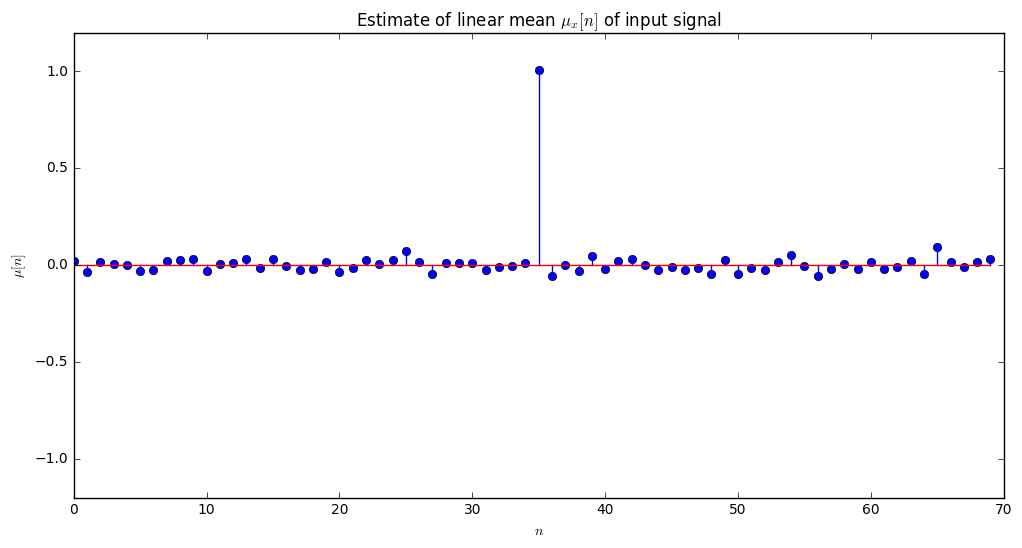

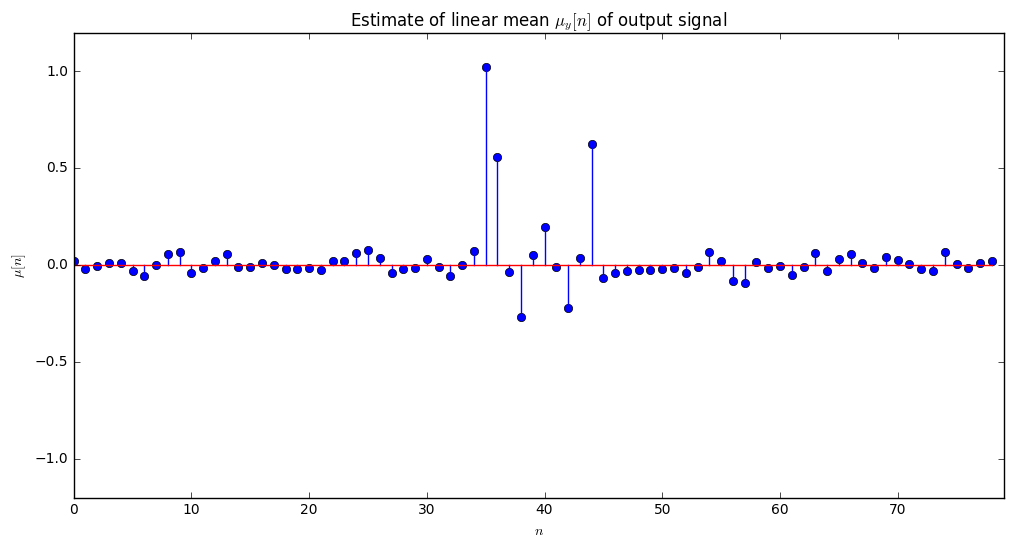

In [19]:
# Computing the linear mean of the LTI system

L = 70  # number of random samples
N = 1000  # number of sample functions

# input white Gaussian noise (x)
x = np.random.normal(size=(N, L))
x[:, L/2] += 1 

# output signal (y)
# Compute the one-dimensional discrete Fourier Transform for real input
h = 2*np.fft.irfft([1,1,1,0,0,0])

y = np.asarray([np.convolve(x[n,:], h, mode='full') for n in range(N)])

# compute and plot results
# estimate linear mean by ensemble average for input
plt.figure(figsize = (12, 6))
plt.title(r'Estimate of linear mean ${\mu}_x[n]$ of input signal')
mu1 = (np.sum(x, 0))/N
plt.stem(mu1)
plt.xlabel(r'$n$')
plt.ylabel(r'${\mu}[n]$')
plt.axis([0, x.shape[1], -1.2, 1.2])

# estimate linear mean by ensemble average for output
plt.figure(figsize = (12, 6))
plt.title(r'Estimate of linear mean ${\mu}_y[n]$ of output signal')
mu2 = (np.sum(y, 0))/N
plt.stem(mu2)
plt.xlabel(r'$n$')
plt.ylabel(r'${\mu}[n]$')
plt.axis([0, y.shape[1], -1.2, 1.2])


##  &nbsp; &nbsp; 2. Auto-Correlation Function (ACF)

Autocorrelation is the correlation of a signal with itself at different points in time. The auto-correlation function (ACF) characterizes the time dependencies of a random signal $x[k]$. It is an important tool in the signal analysis in the communications engineering and system identification.

The ACF of a continuous stationary process $x[n]$ is given by,
$$\phi_{xx}[K]=E{x[n]⋅x[n−K]}$$
 
Here, $K$ denotes the lag of the signal. The ACF has high values for for high similarity and low values for low similarity.

If the random process is ergodic, the ACF can be calculated by averaging along the sample function given by,

$$\phi_{xx}[K]=lim_{K→∞} \frac{1}{2K+1} \sum_{n=-K}^{K}  x[n]⋅x[n−K]$$

The computed ACF is stored in a vector of length $2N−1$. The positive indexes $0,1,…,2N−1$ of this vector cannot be directly interpreted as K. The indexes of the vector have to be shifted by $N−1$.

### Computing the ACF of a speech signal "eric.wav" file [4]:

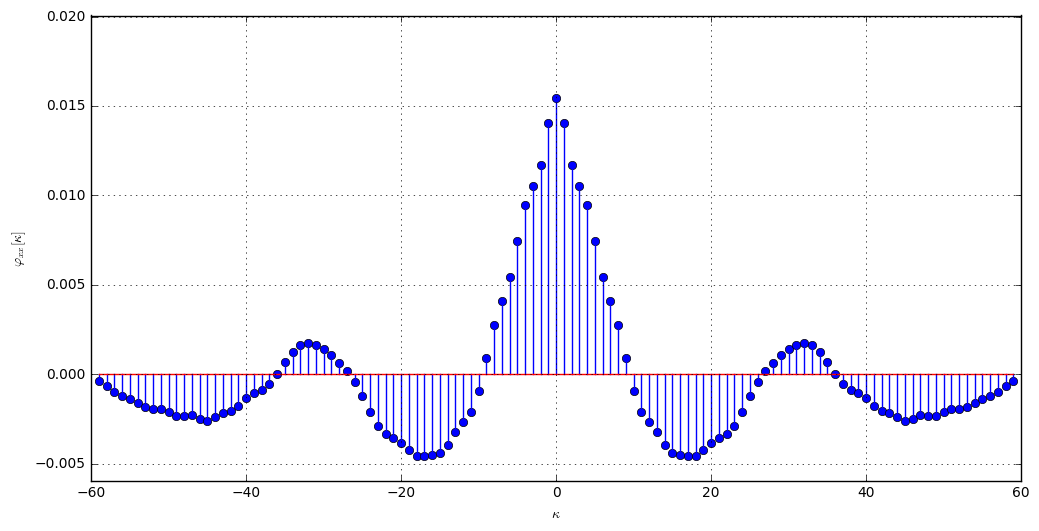

In [22]:
# Computing the Auto Correlation for a wavfile

K = 60  # setting the limit for lags in ACF

# read sound file 
fs, x = wavfile.read('welcome16k.wav')
# welcome16k.wav taken from the course 18792 
# it says "Welcome to DSP 1"

# x = y[:,0] # taking left/right channel from the stereo recorded signal
x = np.asarray(x, dtype=float)/2**15
leng = len(x);

# compute ACF (autocorrelation of x)
acf = (np.correlate(x, x, mode='full'))/leng
ACF = acf[(leng-1)-(K-1):(leng-1)+K]
k_value = np.arange(-(K-1), K)

# plot the function
fig = plt.figure(figsize = (12, 6))
plt.stem(k_value, ACF)
plt.xlabel(r'$\kappa$')
plt.ylabel(r'${\varphi}_{xx}[\kappa]$')
plt.axis([-K, K, 1.3*min(ACF), 1.3*max(ACF)]);
plt.grid()

## &nbsp; &nbsp; 3. Short-Time Fourier Transform (STFT)

STFT is a Fourier-related transform that is used to determine the sinusoidal frequency information and phase content of local sections of a signal as it varies over time ranges. [3]

The discrete Fourier transform ([DFT](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)) is not very optimal for the non-stationary analysis of long signals and it cannot be analyzed in an on-line manner by the DFT. Hence, this motivates to split a long signal into small segments and compute the DFT on these segments. This transformation is termed as the short-time Fourier transformation (STFT).

The STFT $X[μ,n]$ of a signal $x[k]$ is defined as,
$$ X[μ,n] = \sum_{k=n}^{n+N-1} x[k]w[k-n] e^{-j \frac{2\pi}{N}kμ}$$

Here, $w[k]$ represents a window function with length $N$ that is normalized by $\sum_{k=0}^{N-1} w[k] =1$. The signal x[k] is windowed by w[k] with segments of length N. This windowed segment is then transformed by a DFT of length N.

The STFT algorithm has numerous applications in DSP. They are used in the spectral analysis of signals and the non-stationary  signal processing. The resulting spectrum $X[μ,n]$ depends on the frequency index $μ$ and the time index $n$. The techniques used with the STFT is termed as time-frequency processing.

STFT always depend on the length $N$ of the segments, the overlap between those segments, and its window function $w[k]$. The spectral and [temporal resolution](https://en.wikipedia.org/wiki/Temporal_resolution) of the STFT also depends on the length $N$ of the segment and its window function. 

The time index $n$ of the STFT can be further increased by an arbitrary step size which equals the overlap between two consecutive STFTs. The spectra $X[μ,n]$ and $X[μ,n+1]$ have $N−1$ number of overlapping samples.


### Computing the spectrogram of a speech signal "eric.wav" file [4]:

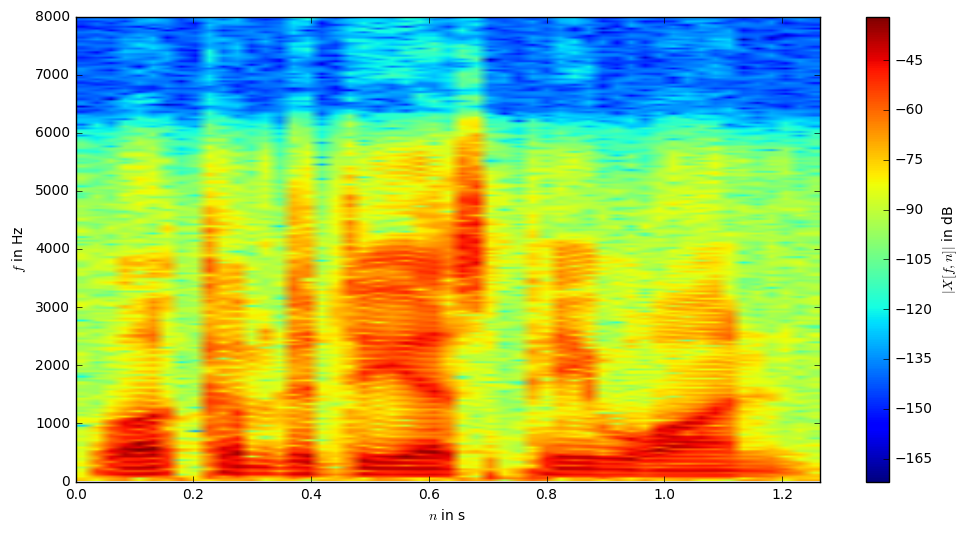

In [16]:
# computing STFT of a speech signal 

L = 512  # length of one segment
overlap = 128  # overlap between segments

# welcome16k.wav taken from the course 18792 
# it says "Welcome to DSP 1"

x, fs = sf.read('welcome16k.wav')
# x = y[:,0] # taking left/right channel from the stereo recorded signal
x = x/np.max(np.abs(x))

# plot spectrogram
plt.figure(figsize = (12, 6))
plt.specgram(x, NFFT=L, Fs=fs, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$ in s')
plt.ylabel(r'$f$ in Hz')
cb = plt.colorbar() # plotting in the color format
cb.set_label(r'$|X[f,n]|$ in dB')
plt.autoscale(tight=True)


## &nbsp; &nbsp; 4. Power Spectral Density (PSD)

Power Spectral Density (PSD) is a measure of a signal's power intensity in the frequency domain. PSD is computed by calculating the Fourier transform of the auto-correlation function (ACF). The PSD calculates the power per frequency for a random signal.

For a continuous-amplitude real-value weakly stationary process the PSD is given by,

$$\Phi_{xx}[e^{j\omega}] = F{\phi_{xx}[k]}$$

where $F$ is the discrete-time Fourier transformation (DTFT). The properties of the PSD are deduced from the properties of the ACF and the DTFT which is given as follows:

$$ \Phi_{xx}[e^{j\omega}] = \Phi_{xx}[e^{-j\omega}]$$

$$ E[x[k]^2] = \phi_{xx}[0] = \frac{1}{2\pi} \int _{-\pi}^{\pi} \Phi_{xx}[e^{j\omega}] d\Omega $$ 

### PSD of the speech signal is calculated by computing the DTFT of ACF [4]:

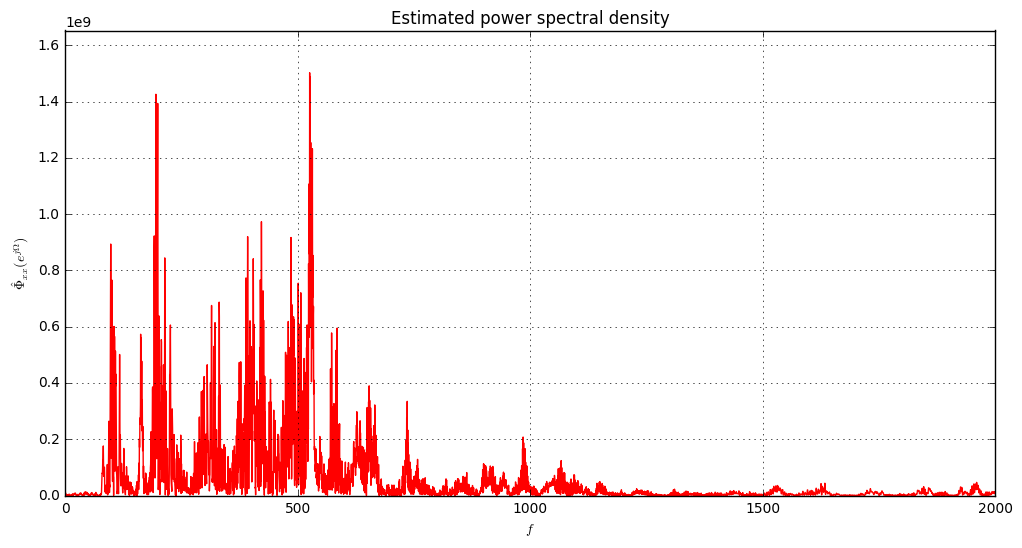

In [5]:
# read sound file 
# eric.wav taken from the course 18792 
# it says ""

fs, x = wavfile.read('welcome16k.wav')
x = np.asarray(x, dtype=float)

# x = y[:,0] # taking left/right channel from the stereo recorded signal

lenG = len(x)
# computing ACF
acf = (np.correlate(x, x, mode='full'))/lenG

# compute PSD = DTFT of ACF
psd = np.fft.rfft(acf)  # Compute the one-dimensional discrete Fourier Transform for real input
f = fs/float(2*lenG) * np.arange(lenG)

# plot PSD
plt.figure(figsize = (12, 6))
plt.plot(f, np.abs(psd),'r')
plt.title('Estimated power spectral density')
plt.ylabel(r'$\hat{\Phi}_{xx}(e^{j \Omega})$')
plt.xlabel(r'$f$')
plt.axis([0, 2000, 0, 1.1*max(np.abs(psd))]);
plt.grid()

### Computing and plotting the magnitude spectra $|X_n[μ]|$ of an [ensemble](https://en.wikipedia.org/wiki/Ensemble_average_(statistical_mechanics) of random signals $x_n[k]$.  Each color denotes one sample function  (total of 10 sample functions) in the plot shown below [4]:

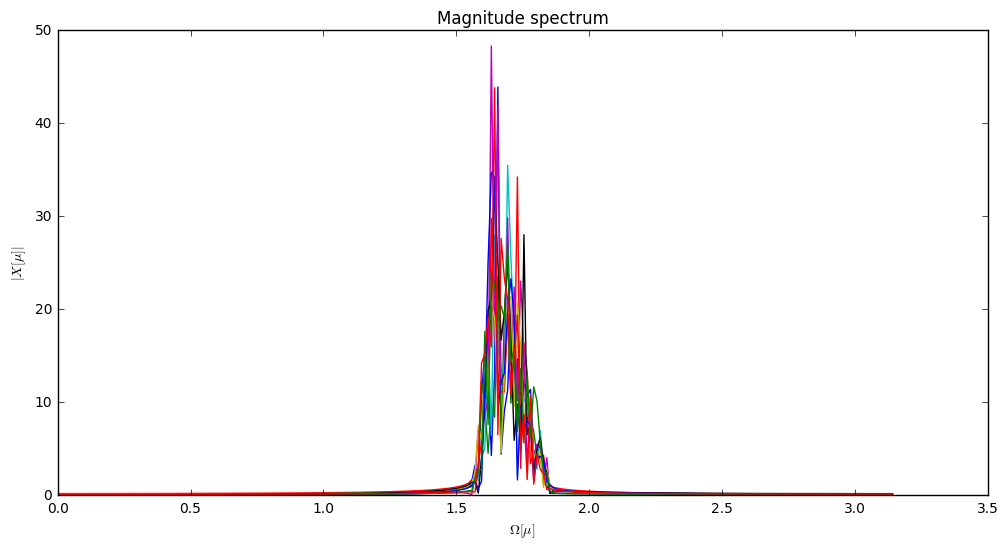

In [6]:

N = 512  # total number of samples
M = 10  # number of 10 sample functions to be shown

# generate random signal
x = np.random.normal(size=(M, N))
h = sig.firwin2(N, [0, .5, .52, .53, .59, 1], [0, 0, 1, 1, 0, 0])
x = [np.convolve(xi, h, mode='same') for xi in x]

# DTFT of signal
# Compute the one-dimensional discrete Fourier Transform for real input
X = np.fft.rfft(x, axis=1)
E = np.linspace(0, np.pi, X.shape[1])

# plot signal and its spectrum
plt.figure(figsize = (12, 6))
plt.plot(E, np.abs(X.T))
plt.title('Magnitude spectrum')
plt.xlabel(r'$\Omega[\mu]$')
plt.ylabel(r'$|X[\mu]|$')


## Parametric and Non-Parametric PSD estimations

The non-parametric method estimates the spectrum of the process that doesn't have any prior particular structure. The periodogram is one such example which is equivalent to the Fourier transform of the biased autocovariance convolved with a [Fejér kernel](https://en.wikipedia.org/wiki/Fejér_kernel). By contrast, the parametric approaches assume that the underlying stationary stochastic process has a certain structure before hand. This can be described using a small number of parameters (which are explained below). For these approaches, the task is to estimate the parameters of the model that describes the stochastic random process.

### Non-Parametric PSD Estimation Methods

Following are the common Non-paramteric methods that are used to estimate the PSD:

### &nbsp; &nbsp; 1. [Periodograms](https://en.wikipedia.org/wiki/Periodogram)

Periodograms are used to identify the dominant frequencies of a time series.  This can be a helpful tool for identifying the dominant cyclical behavior in a series, particularly when the cycles are not related to the commonly encountered monthly or quarterly seasonality. A periodogram is an estimate of the spectral density of a signal which was coined by Arthur Schuster in 1898.[5]

The true PSD is given as $Φ_{xx}(e^{jΩ})=1$. In order to compute the periodogram by the discrete Fourier transformation (DFT), the signal $x[k]$ has to be zero-padded to ensure that above convolution is not circular.[4]

### The below implementation estimates the PSD of a random process which draws 512 samples from normal distributed gaussian white noise with zero-mean and unit variance. [4] 

Mean value of the periodogram is given by: 1.003945


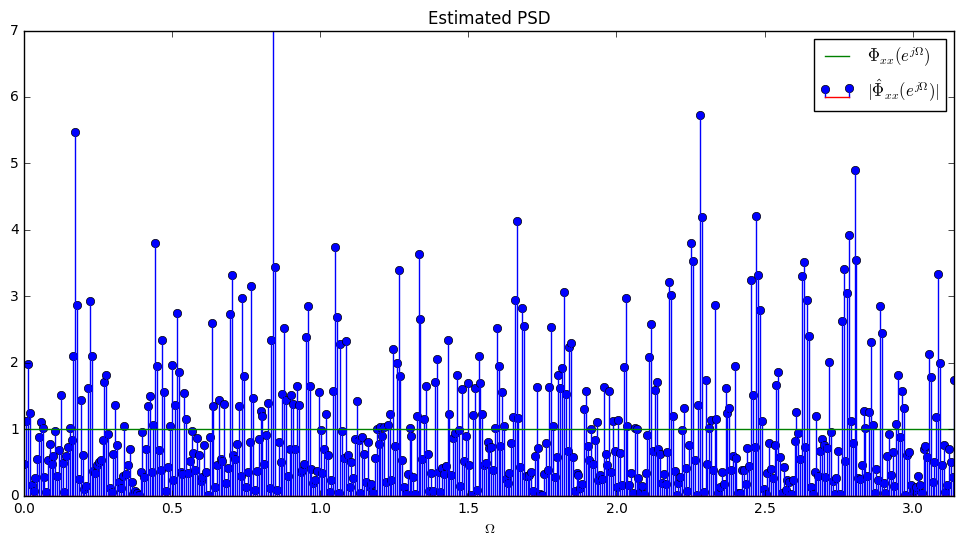

In [7]:
N = 512  # number of samples

# generate random signal
x = np.random.normal(size=N)

# compute magnitude of the periodogram
x = np.concatenate((x, np.zeros_like(x)))

# Compute the one-dimensional discrete Fourier Transform for real input
X = np.fft.rfft(x)
E = np.linspace(0, np.pi, len(X))
S = (abs(X)**2)/N # magnitude

# plot
plt.figure(figsize=(12,6))
plt.stem(E, S, 'b', label=r'$|\hat{\Phi}_{xx}(e^{j \Omega})|$')
plt.plot(E, np.ones_like(S), 'g', label=r'$\Phi_{xx}(e^{j \Omega})$')
plt.title('Estimated PSD')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 7])
plt.legend()

# compute mean value of the periodogram
print('Mean value of the periodogram is given by: %f' %np.mean(np.abs(S)))



### &nbsp; &nbsp; 2. [Welch Method](https://en.wikipedia.org/wiki/Welch%27s_method)

An improved estimator of the PSD is the one proposed by Welch. It consists of dividing the overlapping time series data into segments, computing periodogram of each segment, and then averaging the PSD estimates to produce the Welch's PSD estimate.

The below implementation is somewhat equivalent to the periodogram implementation done before. The true PSD is also given as $Φ_{xx}(e^{jΩ})=1$. [4]

### Here we aim at estimating the PSD of a stochastic process which 512 draws samples from normal distributed gaussian white noise with zero-mean and unit variance. [4]

Mean value of the periodogram (Welch Method) is given by 0.952601


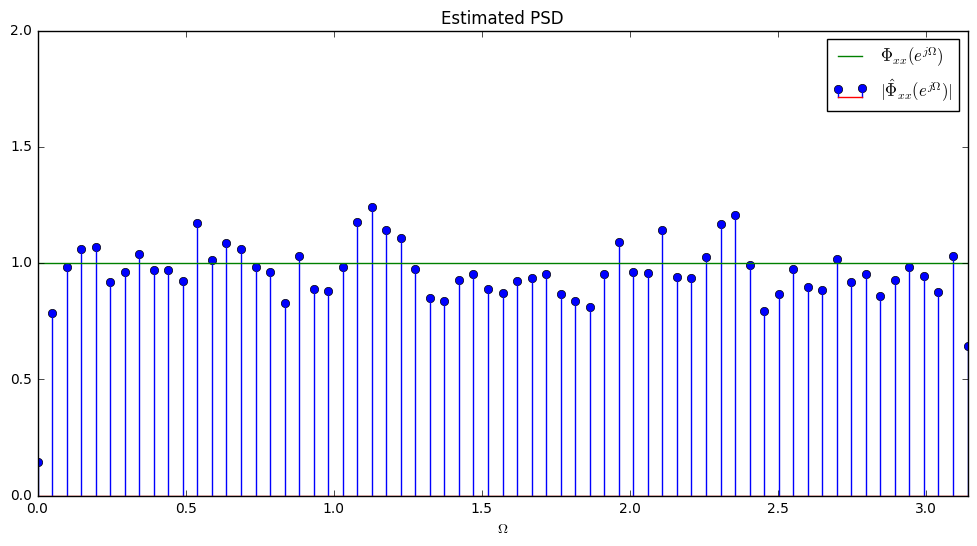

In [8]:
N = 128  # length of segments
M = 64  # stepsize
L = 100  # total number of segments

# generate random signal
x = np.random.normal(size=L*M)

# compute periodogram by Welch's method
nf, Pxx = sig.welch(x, window='hamming', nperseg=N, noverlap=(N-M))
Pxx = .5*Pxx  # due to normalization in scipy.signal
Om = 2*np.pi*nf

# plot
plt.figure(figsize=(12,6))
plt.stem(Om, Pxx, 'b', label=r'$|\hat{\Phi}_{xx}(e^{j \Omega})|$')
plt.plot(Om, np.ones_like(Pxx), 'g', label=r'$\Phi_{xx}(e^{j \Omega})$')
plt.title('Estimated PSD')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 2])
plt.legend()

# compute the mean value of the periodogram
print('Mean value of the periodogram (Welch Method) is given by %f' %np.mean(np.abs(Pxx)))

# code snippet from [4]

### Parametric Method PSD Estimation Methods

Following are the common paramteric methods that are used to estimate the PSD:

### &nbsp; &nbsp; 1. Auto Regressive [(AR Model)](https://en.wikipedia.org/wiki/Autoregressive_model)

Autoregressive is a random stochastic process used in the statistical calculations where future values are estimated based on a weighted sum of previous values. It operates under the premise that previous values have an effect on present values.

### &nbsp; &nbsp; 2. Moving Average [(MA Model)](https://en.wikipedia.org/wiki/Moving-average_model)

The moving average (MA) model is a common approach for modeling univariate time series. The moving average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

### &nbsp; &nbsp; 3. Auto Regressive Moving Average [(ARMA Model)](https://en.wikipedia.org/wiki/Autoregressive–moving-average_model)

It is the combination of the two above models. Autoregressive-moving-average (ARMA) models are mathematical models of the persistence, or autocorrelation, in a time series. ARMA models are used to predict the behavior of a time series from previous values alone. Such a prediction can be used to evaluate the importance of other variables to the system. Hence, ARMA models are widely used in hydrology, dendrochronology, econometrics, and many other fields. [6]

###### The mathematical expressions can be studied from the links given above for the Parametric Models as well as Non-Parametric Models.


### In the following example $n[k]$ is drawn from normal distributed gaussian white noise with $N_0=1$. The [Yule-Walker equations](https://en.wikipedia.org/wiki/Autoregressive_model#Yule.E2.80.93Walker_equations) are used to estimate the parameters of an AR model of $H(e^{jΩ})$. The implementation provided by statsmodels.api.regression.yule_walker returns the estimated AR coefficients of the system $H(e^{jΩ})$. These parameters are then used to numerically evaluate the estimated transfer function resulting in $Φ̂_{xx}(e^{jΩ})= 1⋅|Ĥ (e^{jΩ})|^{2}$  [4]

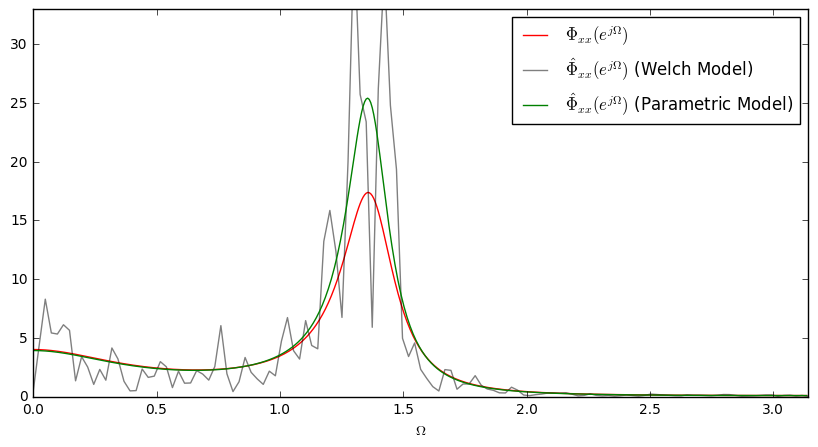

In [9]:
N = 3  # order of AR model
K = 512  # length of random signal
a = np.array((1, -1, 0.5))  # coefficients of AR model

# generate gaussian random signal n[k]
n = np.random.normal(size=K)

# AR model for random signal x[k]
x = np.zeros(K)
for k in np.arange(3, K):
    x[k] = a[0]*x[k-1] + a[1]*x[k-2] + a[2]*x[k-3] + n[k]
    
# estimate AR parameters by Yule-Walker method
rho, sigma = sm.regression.yule_walker(x, order=N, method='mle')

# compute the estimated transfer function
Om, H = sig.freqz(1, np.insert(-a, 0, 1))
Om, He = sig.freqz(1, np.insert(-rho, 0, 1))

# compute PSD by Welch method
Om2, Pxx = sig.welch(x, return_onesided=True)

# plot PSDs
plt.figure(figsize=(10,5))
plt.plot(Om, np.abs(H)**2,'r', label=r'$\Phi_{xx}(e^{j\Omega})$')
plt.plot(Om2*2*np.pi, .5*np.abs(Pxx), 'k-', alpha=.5 , label=r'$\hat{\Phi}_{xx}(e^{j\Omega})$ (Welch Model)')
plt.plot(Om, np.abs(He)**2,'g', label=r'$\hat{\Phi}_{xx}(e^{j\Omega})$ (Parametric Model)')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 33])
plt.legend();

# code snippet from [4]

# References

### &nbsp; &nbsp; [1] National Semiconductor Application Note 255, "Power Spectral Estimation", November 1980
### &nbsp; &nbsp; [2] Petre Stoica and Randolph Moses, "Spectral Analysis of Signals"
### &nbsp; &nbsp; [3] Sejdić E.; Djurović I.; Jiang J. (2009). "Time-frequency feature representation using energy concentration: An overview of recent advances". Digital Signal Processing. 19 (1): 153–183. doi:10.1016/j.dsp.2007.12.004
### &nbsp; &nbsp; [4] Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016
### &nbsp; &nbsp; [5] Schuster, A., "On the investigation of hidden periodicities with application to a supposed 26 day period of meteorological phenomena," Terrestrial Magnetism, 3, 13-41, 1898.
### &nbsp; &nbsp; [6] Notes_5, GEOS 585A, Spring 2015 : http://www.ltrr.arizona.edu/~dmeko/notes_5.pdf